<a href="https://colab.research.google.com/github/sankarsasmal/Python/blob/master/Statistics_with_Python_Quickstart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from google.colab import files
uploaded = files.upload()


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Saving DOE_Python.csv to DOE_Python.csv


In [0]:
import io
df=pd.read_csv(io.BytesIO(uploaded['DOE_Python.csv']))
print(df.head())
#X1=wing length, X2=no of paperclips

   Sr_No  Sq_No  Repeat  X1_cm  X2_no  Flight_time_S
0      1      2       1      6      1           2.41
1      2     10       2      6      1           2.38
2      3      5       3      6      1           2.53
3      4      8       1     12      1           3.11
4      5      3       2     12      1           3.20


In [0]:
#https://www.youtube.com/watch?v=UgtjatBt3vY
df = df[['X1_cm','X2_no', 'Flight_time_S']]
df.head()

,X1_cm,X2_no,Flight_time_S
0,6,1,2.41
1,6,1,2.38
2,6,1,2.53
3,12,1,3.11
4,12,1,3.20


In [0]:
df.corr()

,X1_cm,X2_no,Flight_time_S
X1_cm,1.000000,0.000000,0.854775
X2_no,0.000000,1.000000,-0.491041
Flight_time_S,0.854775,-0.491041,1.000000


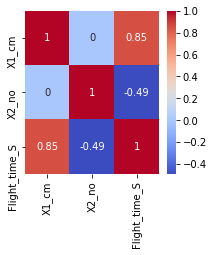

In [0]:
plt.figure(figsize=(3,3))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")

In [0]:
#ANOVA interaction plot
#https://www.youtube.com/watch?v=v4y6nS31t8k
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.graphics.factorplots import interaction_plot

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from google.colab import files
uploaded = files.upload()

Saving DOE_Python.csv to DOE_Python.csv


In [0]:
import io
df=pd.read_csv(io.BytesIO(uploaded['DOE_Python.csv']))
df = df[['X1_cm','X2_no', 'Flight_time_S']]
df.head()

,X1_cm,X2_no,Flight_time_S
0,6,1,2.41
1,6,1,2.38
2,6,1,2.53
3,12,1,3.11
4,12,1,3.20


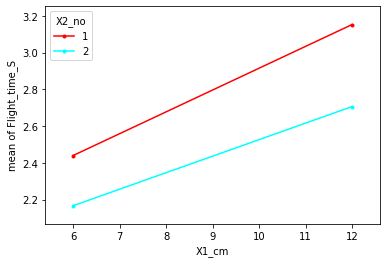

In [0]:
interaction_plot(df['X1_cm'],df['X2_no'],df['Flight_time_S'])
plt.show()

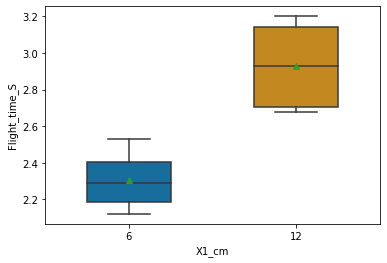

In [0]:
sns.boxplot(y='Flight_time_S', x='X1_cm', 
                 data=df, 
                 width=0.5,showmeans=True,
                 palette="colorblind")

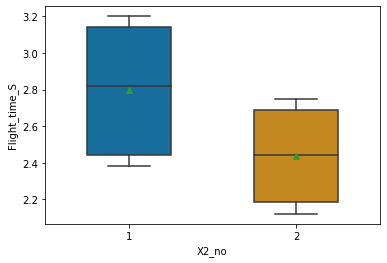

In [0]:
sns.boxplot(y='Flight_time_S', x='X2_no', 
                 data=df, 
                 width=0.5, showmeans=True,
                 palette="colorblind")

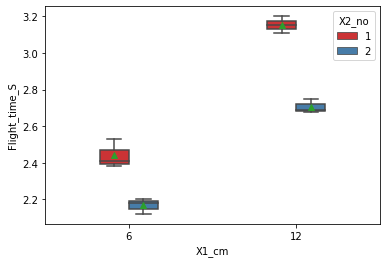

In [0]:
sns.boxplot(x="X1_cm", y="Flight_time_S", hue="X2_no", data=df, width=0.35, showmeans=True,
                palette="Set1") 

In [0]:
df = df[['X1_cm','X2_no', 'Flight_time_S']]
df.groupby(['X1_cm']).mean()

,X2_no,Flight_time_S
X1_cm,,
6,1.5,2.303333
12,1.5,2.930000


In [0]:
df = df[['X2_no','X1_cm','Flight_time_S']]
df.groupby(['X2_no']).mean()

,X1_cm,Flight_time_S
X2_no,,
1,9,2.796667
2,9,2.436667


In [0]:
from google.colab import files
uploaded = files.upload()

Saving DOE_Python.csv to DOE_Python (1).csv


In [0]:
import io
df=pd.read_csv(io.BytesIO(uploaded['DOE_Python.csv']))
df.head()

,Sr_No,Sq_No,Repeat,X1_cm,X2_no,Flight_time_S
0,1,2,1,6,1,2.41
1,2,10,2,6,1,2.38
2,3,5,3,6,1,2.53
3,4,8,1,12,1,3.11
4,5,3,2,12,1,3.20


In [0]:
#2way_anova
#https://reneshbedre.github.io/blog/anova.html
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [0]:
model=ols('Flight_time_S ~ (X1_cm)+(X2_no)+(X1_cm):(X2_no)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
X1_cm,1.178133,1.0,409.785507,3.704745e-08
X2_no,0.388800,1.0,135.234783,2.722480e-06
X1_cm:X2_no,0.022533,1.0,7.837681,2.321266e-02
Residual,0.023000,8.0,NaN,NaN


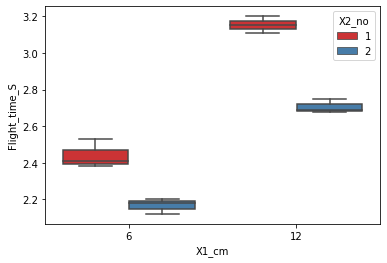

In [0]:
sns.boxplot(x="X1_cm", y="Flight_time_S", hue="X2_no", data=df, palette="Set1") 

In [4]:
#Linear Regression
#https://www.youtube.com/watch?v=J_LnPL3Qg70&t=1s
import pandas as pd
import numpy as np
from sklearn import linear_model
from google.colab import files
import matplotlib.pyplot as plt
uploaded = files.upload()

Saving DOE_Python.csv to DOE_Python.csv


In [5]:
import io
df=pd.read_csv(io.BytesIO(uploaded['DOE_Python.csv']))
df.head()

,Sr_No,Sq_No,Repeat,X1_cm,X2_no,Flight_time_S
0,1,2,1,6,1,2.41
1,2,10,2,6,1,2.38
2,3,5,3,6,1,2.53
3,4,8,1,12,1,3.11
4,5,3,2,12,1,3.20


In [0]:
reg= linear_model.LinearRegression()
reg.fit(df[['X1_cm','X2_no']],df.Flight_time_S)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
reg.coef_

array([ 0.10444444, -0.36      ])

In [0]:
reg.intercept_

2.2166666666666663

In [21]:
#Converting column value to list
X1_list=df['X1_cm'].to_list()
X2_list=df['X2_no'].to_list()
FlightTime_list=df['Flight_time_S'].to_list()
#converting list to array
X1_arr = np.array(X1_list)
X2_arr = np.array(X2_list)  
FlightTime_arr = np.array(FlightTime_list) 

array([ 6,  6,  6, 12, 12, 12,  6,  6,  6, 12, 12, 12])

In [0]:
#3D multivarient plotting
from mpl_toolkits.mplot3d import Axes3D

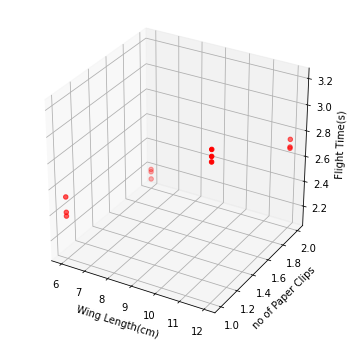

In [26]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
x =X1_arr
y =X2_arr
z =FlightTime_arr
ax.scatter(x, y, z, c='r', marker='o')

ax.set_xlabel('Wing Length(cm)')
ax.set_ylabel('no of Paper Clips')
ax.set_zlabel('Flight Time(s)')

plt.show()